About Dataset
---
Context

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

The dataset has the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.

# **1. Conexion Drive**

In [236]:
# from google.colab import drive
# drive.mount('/gdrive')

# path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Kaggle/'

In [237]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# **2. Lectura de datos**

In [238]:
fullpath = 'https://raw.githubusercontent.com/bryanOsmar07/Data_Repository/main/insurance.csv'

In [239]:
df = pd.read_csv(fullpath)

In [240]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# **3. Data Wrangling**

In [241]:
df.shape

(1338, 7)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [243]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [244]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [245]:
print(categorical_columns)

['sex', 'smoker', 'region']


# **4. EDA**

In [246]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


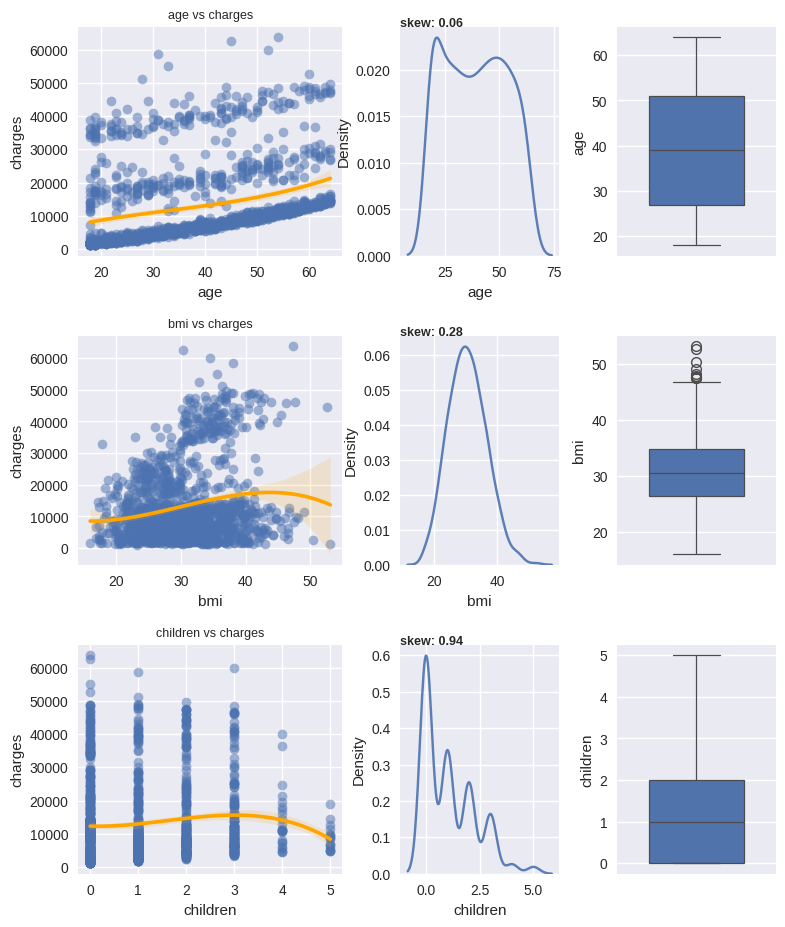

In [247]:
# Analisis de las variables Numericas
number_columns = df.select_dtypes("number").drop("charges", axis=1)

skewness_before_log = df[number_columns.columns].skew()
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(9, 11),
    gridspec_kw={"hspace": 0.35, "wspace": 0.3, "width_ratios": [0.5, 0.3, 0.3]},
)
axes = axes.flatten()
i = 0
for column in number_columns.columns:
    ax = axes[i]
    sns.regplot(
        data=df,
        x=column,
        y="charges",
        ax=ax,
        scatter_kws={"alpha": 0.5},
        marker="o",
        line_kws={"color": "orange"},
        order=3,
    )
    ax.set_title(f"{column} vs charges", size=9)
    ax = axes[i + 1]
    sns.kdeplot(data=df, x=column, ax=ax, fill=False, alpha=0.9, legend=True)
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )

    ax = axes[i + 2]
    sns.boxplot(
        data=df,
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    i += 3

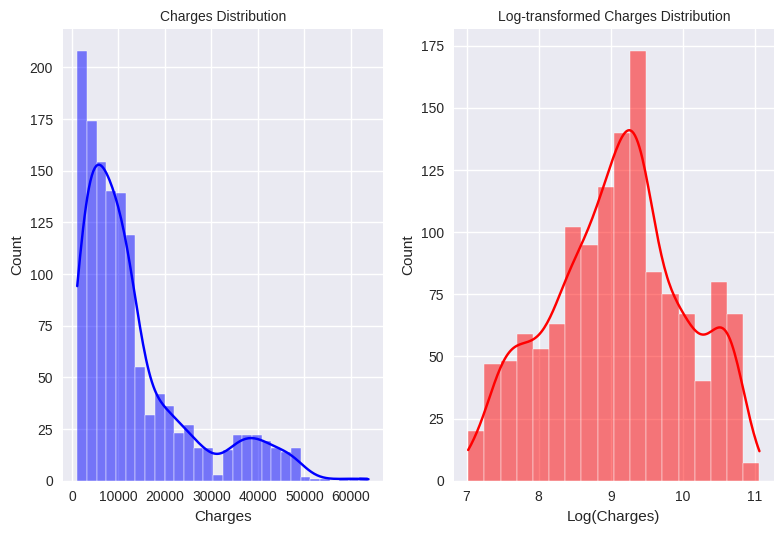

In [248]:
# Distribucion del target (y del log del target)
fig = plt.figure()
plt.subplot(121)
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Charges Distribution', size=10)
plt.xlabel('Charges')

plt.subplot(122)
sns.histplot(np.log(df['charges']), kde=True, color='red')
plt.title('Log-transformed Charges Distribution', size=10)
plt.xlabel('Log(Charges)')
plt.tight_layout()
plt.show()

<Axes: >

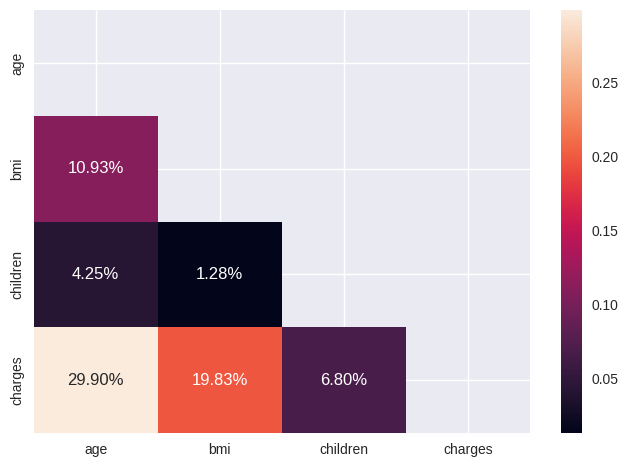

In [249]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2%")

In [250]:
df.corr(numeric_only=True)['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [251]:
# Creamos el campo rango de edad
df["age group"] = pd.cut(df.age, bins=[0, 40, 60, 100], labels=["young adult", "middle-aged", "old adults"])
df.groupby("age group")["charges"].agg(["mean", "count"])

,mean,count
age group,,
young adult,10219.422874,701
middle-aged,15888.757668,546
old adults,21063.163398,91


In [252]:
# Los cargos medicos son mayores para las personas con mas edad

In [253]:
df.groupby("smoker")["charges"].agg(["mean", "count"])

,mean,count
smoker,,
no,8434.268298,1064
yes,32050.231832,274


In [254]:
# Los cargos medicos son mayores para las personas fumadoras

In [255]:
from itertools import product
from collections import Counter

a = df["smoker"].unique().tolist()
b = df["age group"].unique().tolist()

labels = dict(zip(product(a, b, repeat=1), [4, 5, 6, 1, 2, 3]))


df["smoker_aged"] = df[["smoker", "age group"]].apply(lambda x: labels[tuple(x)], axis=1)

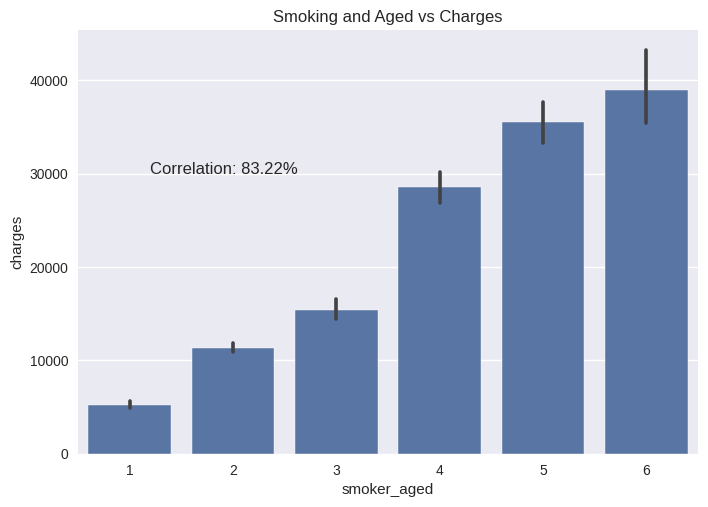

In [256]:
sns.barplot(data=df, x="smoker_aged", y="charges")
correlation = df[["smoker_aged"]].corrwith(df.charges)[0]
plt.text(0.2, 30000, f"Correlation: {correlation:.2%}")
plt.title("Smoking and Aged vs Charges")
plt.show()

In [257]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age group,smoker_aged
0,19,female,27.900,0,yes,southwest,16884.92400,young adult,4
1,18,male,33.770,1,no,southeast,1725.55230,young adult,1
2,28,male,33.000,3,no,southeast,4449.46200,young adult,1
3,33,male,22.705,0,no,northwest,21984.47061,young adult,1
4,32,male,28.880,0,no,northwest,3866.85520,young adult,1


## Correlacion

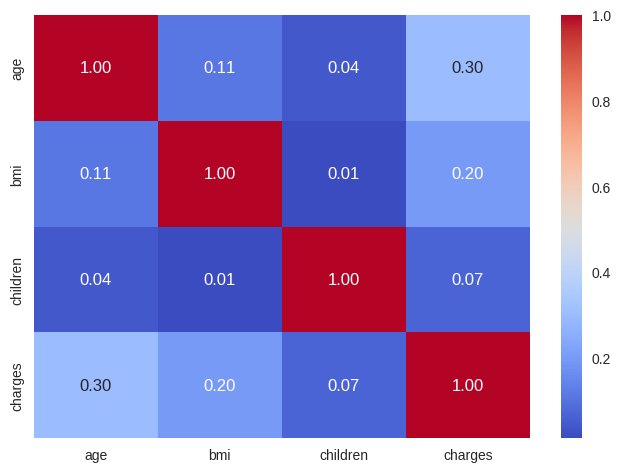

In [258]:
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show();

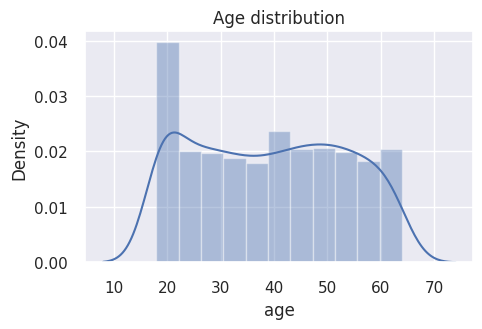

In [259]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show();

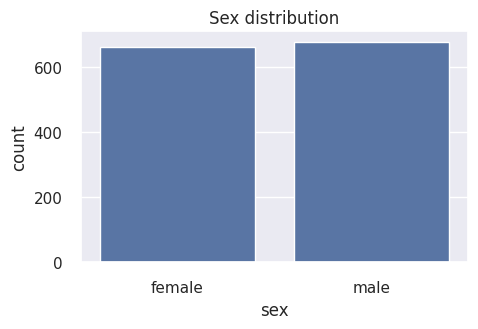

In [260]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.countplot(x = 'sex',data=df)
plt.title('Sex distribution')
plt.show();

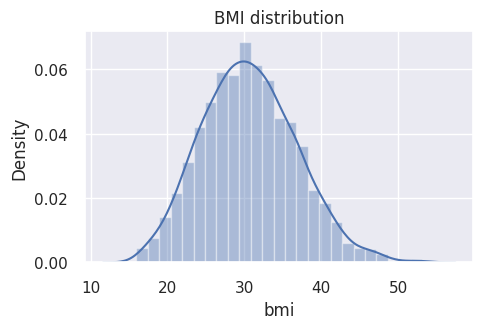

In [261]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show();

Normal BMI range ==> 18.5 to 24.9

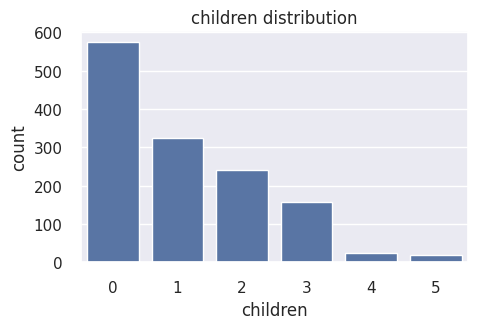

In [262]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.countplot(x = 'children',data=df)
plt.title('children distribution')
plt.show();

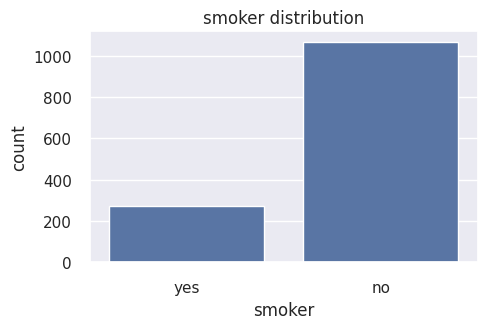

In [263]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.countplot(x = 'smoker',data=df)
plt.title('smoker distribution')
plt.show();

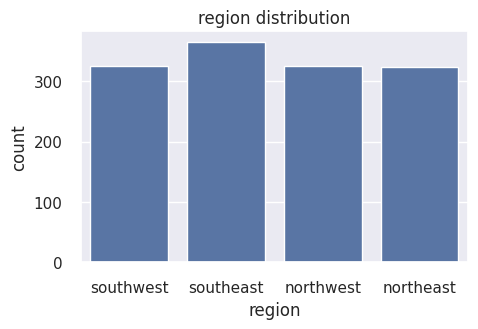

In [264]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.countplot(x = 'region',data=df)
plt.title('region distribution')
plt.show();

In [265]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

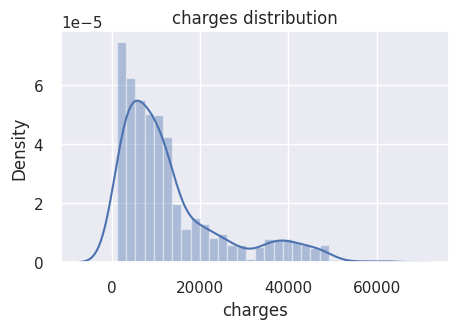

In [266]:
# Distribution
sns.set()
plt.figure(figsize=(5,3))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show();

# **5. Data Pre Processing**

## Encoding

In [267]:
df.head(7)

,age,sex,bmi,children,smoker,region,charges,age group,smoker_aged
0,19,female,27.900,0,yes,southwest,16884.92400,young adult,4
1,18,male,33.770,1,no,southeast,1725.55230,young adult,1
2,28,male,33.000,3,no,southeast,4449.46200,young adult,1
3,33,male,22.705,0,no,northwest,21984.47061,young adult,1
4,32,male,28.880,0,no,northwest,3866.85520,young adult,1
5,31,female,25.740,0,no,southeast,3756.62160,young adult,1
6,46,female,33.440,1,no,southeast,8240.58960,middle-aged,2


In [268]:
from sklearn.preprocessing import LabelEncoder

In [269]:
encoder = LabelEncoder()

In [270]:
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])
df['age group'] = encoder.fit_transform(df['age group'])

In [271]:
# # Sex columns
# df.replace({'sex':{'male':0,'female':1}},inplace=True)
# # smoker columns
# df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# # region columns
# df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [272]:
df.head(7)

,age,sex,bmi,children,smoker,region,charges,age group,smoker_aged
0,19,0,27.900,0,1,3,16884.92400,2,4
1,18,1,33.770,1,0,2,1725.55230,2,1
2,28,1,33.000,3,0,2,4449.46200,2,1
3,33,1,22.705,0,0,1,21984.47061,2,1
4,32,1,28.880,0,0,1,3866.85520,2,1
5,31,0,25.740,0,0,2,3756.62160,2,1
6,46,0,33.440,1,0,2,8240.58960,0,2


In [273]:
df.corr()['charges'].sort_values()

age group     -0.229866
region        -0.006208
sex            0.057292
children       0.067998
bmi            0.198341
age            0.299008
smoker         0.787251
smoker_aged    0.832151
charges        1.000000
Name: charges, dtype: float64

<Axes: >

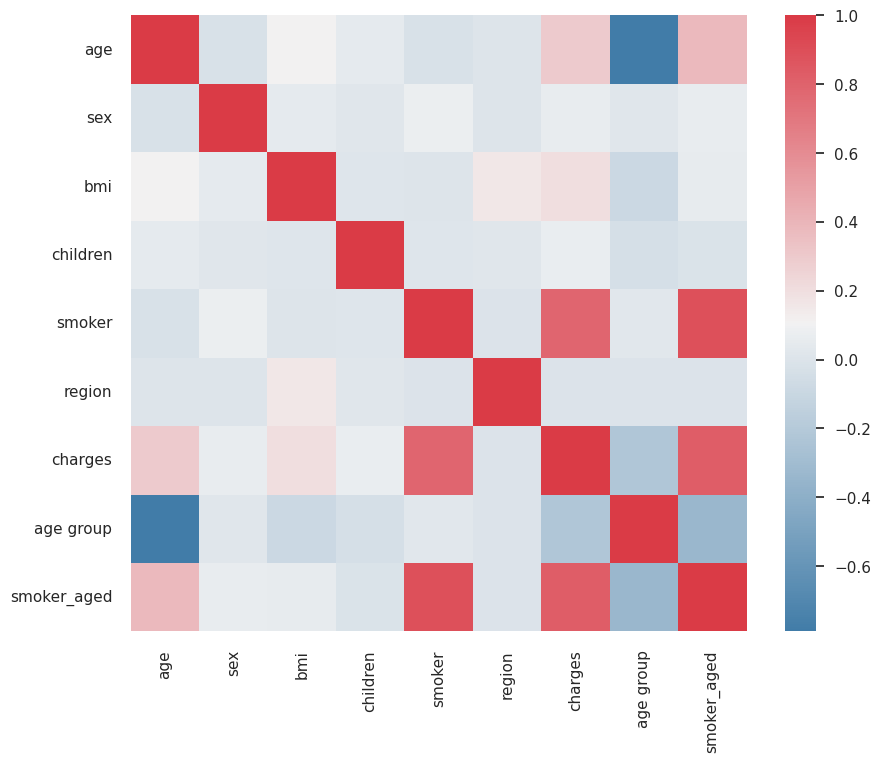

In [274]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [275]:
# Hay una fuerte correlacion en el hecho de si una persona es o no es fumadora

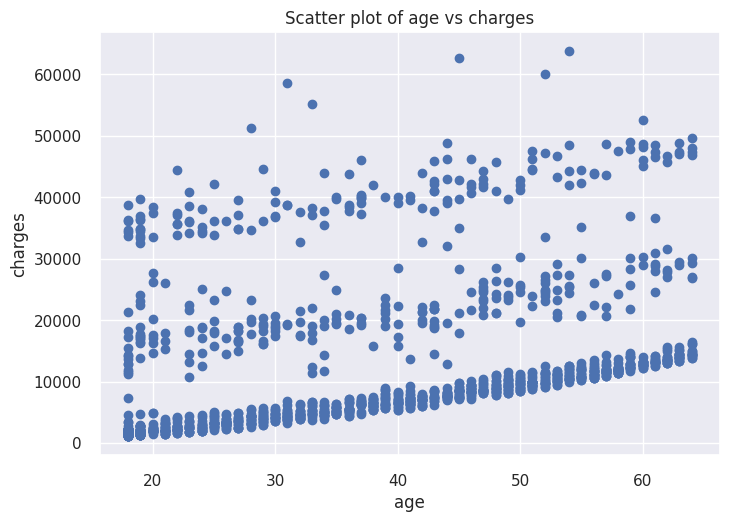

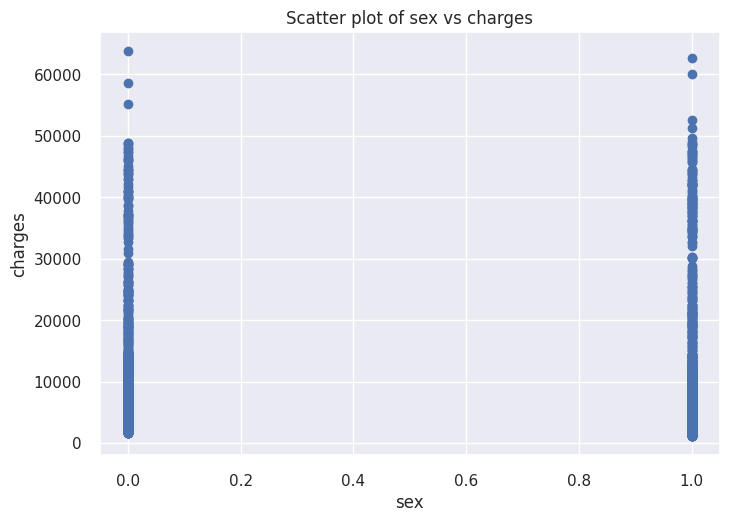

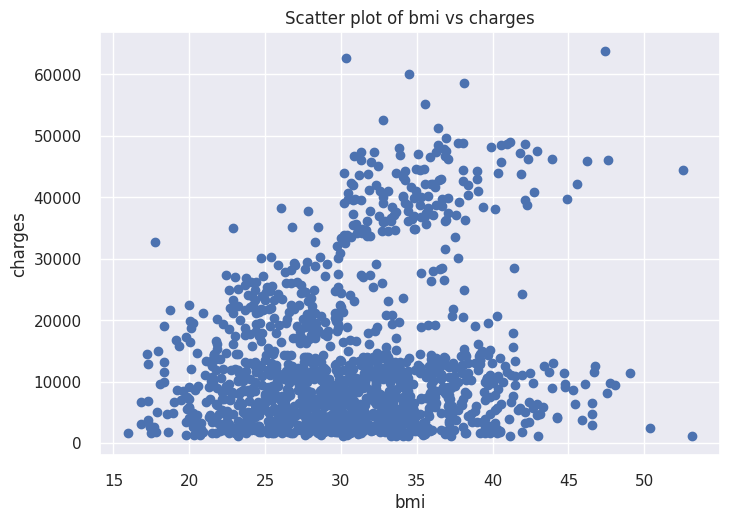

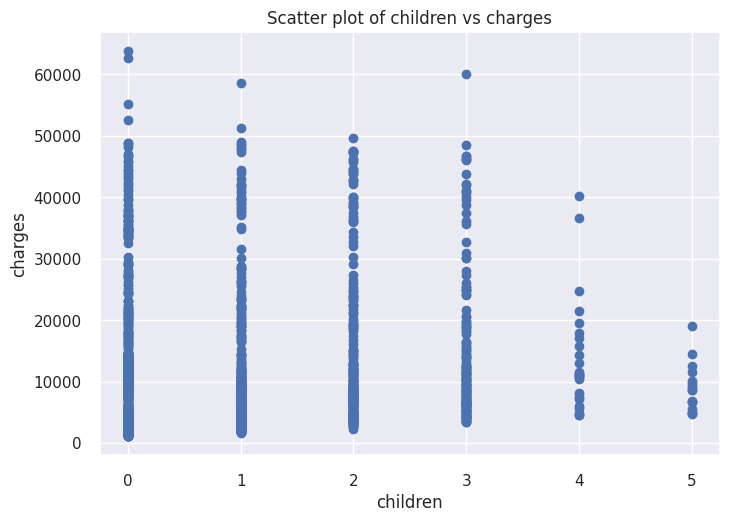

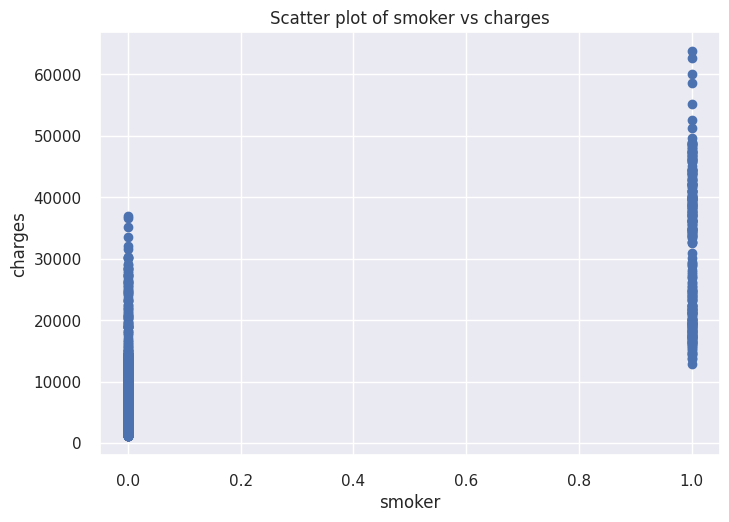

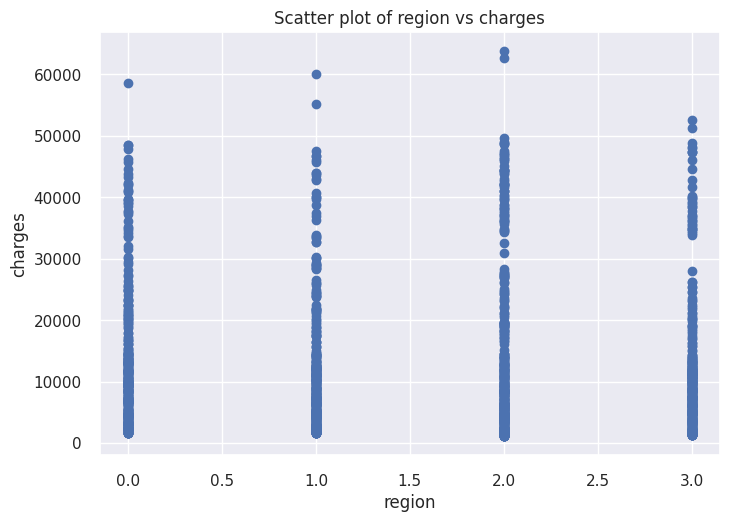

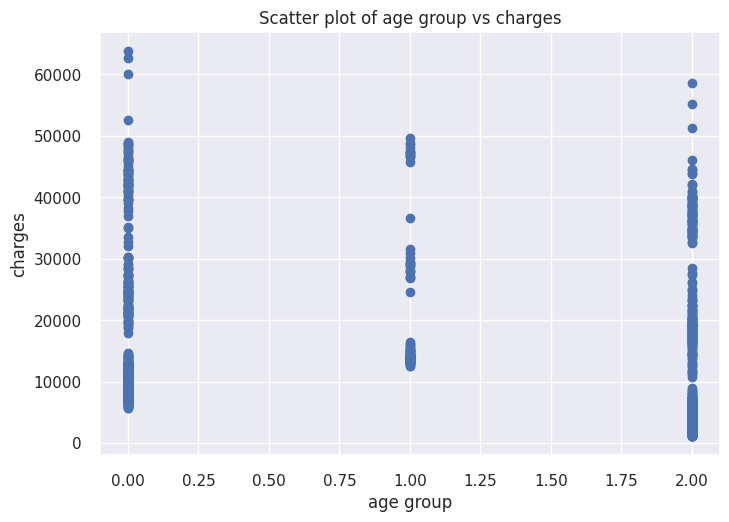

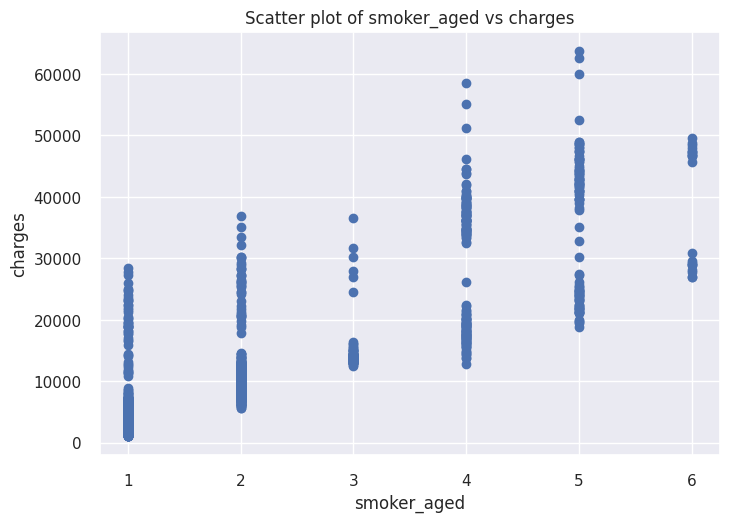

In [276]:
output_variable = 'charges'

for column in df.columns:
    if column != output_variable:
        plt.scatter(df[column], df[output_variable])
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Scatter plot of {column} vs {output_variable}')
        plt.show()

<Figure size 600x600 with 0 Axes>

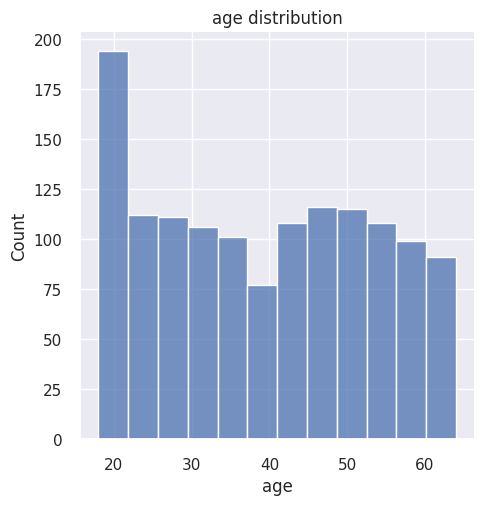

<Figure size 600x600 with 0 Axes>

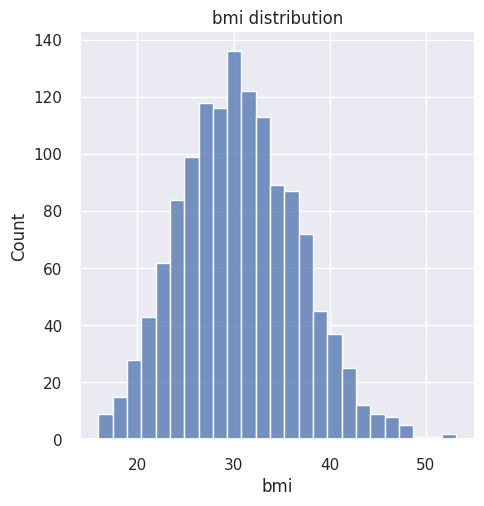

<Figure size 600x600 with 0 Axes>

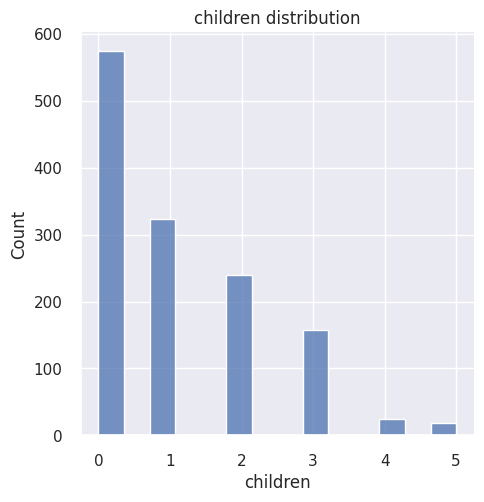

<Figure size 600x600 with 0 Axes>

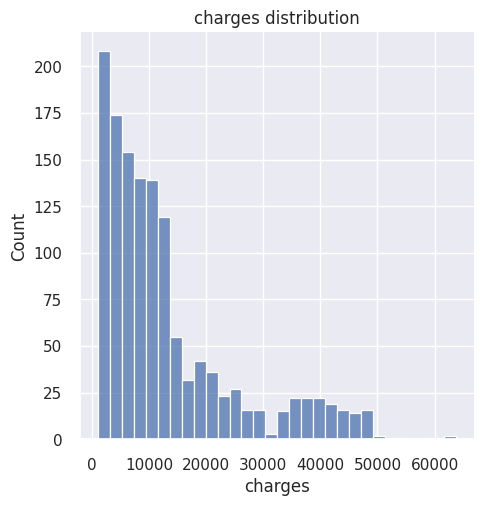

In [277]:
for column in numeric_columns:
    plt.figure(figsize = (6, 6))
    sns.displot(df[column])
    plt.title(f'{column} distribution')
    plt.show()

In [278]:
categorical_columns

['sex', 'smoker', 'region']

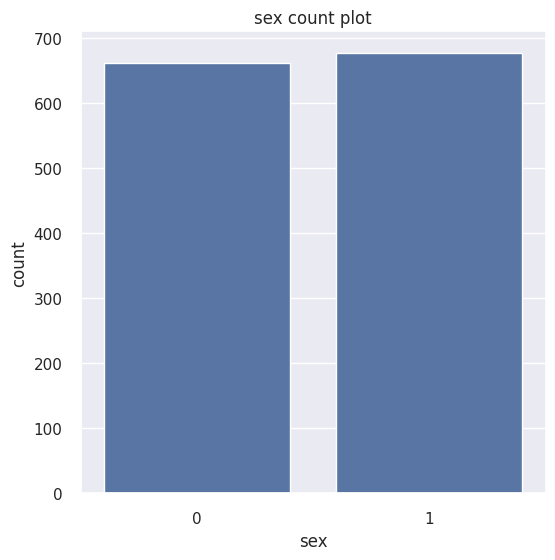

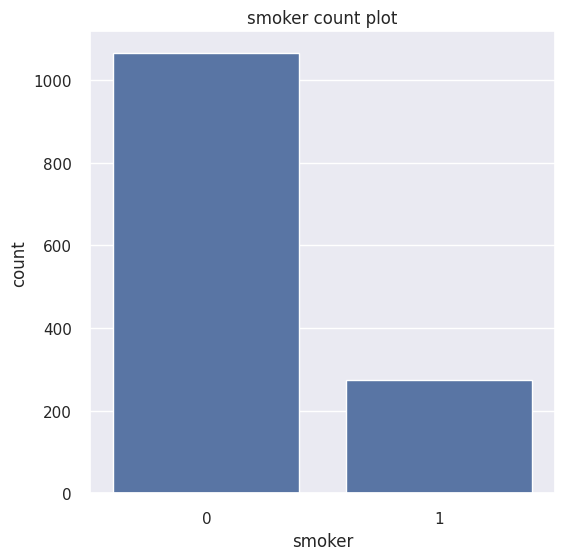

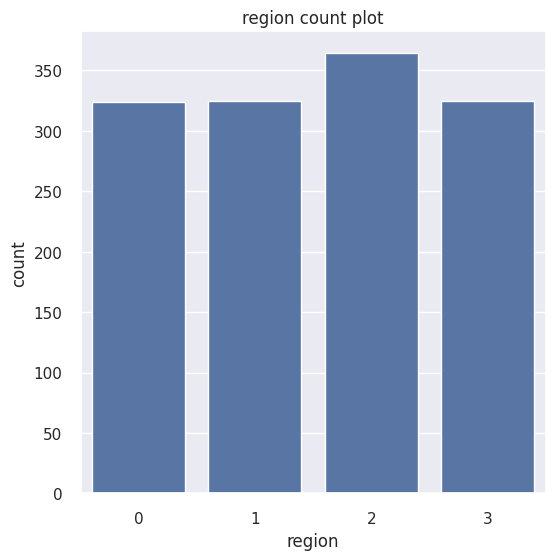

In [279]:
for column in categorical_columns:
    plt.figure(figsize = (6,6))
    sns.countplot(x = column, data = df)
    plt.title(f'{column} count plot')
    plt.show()

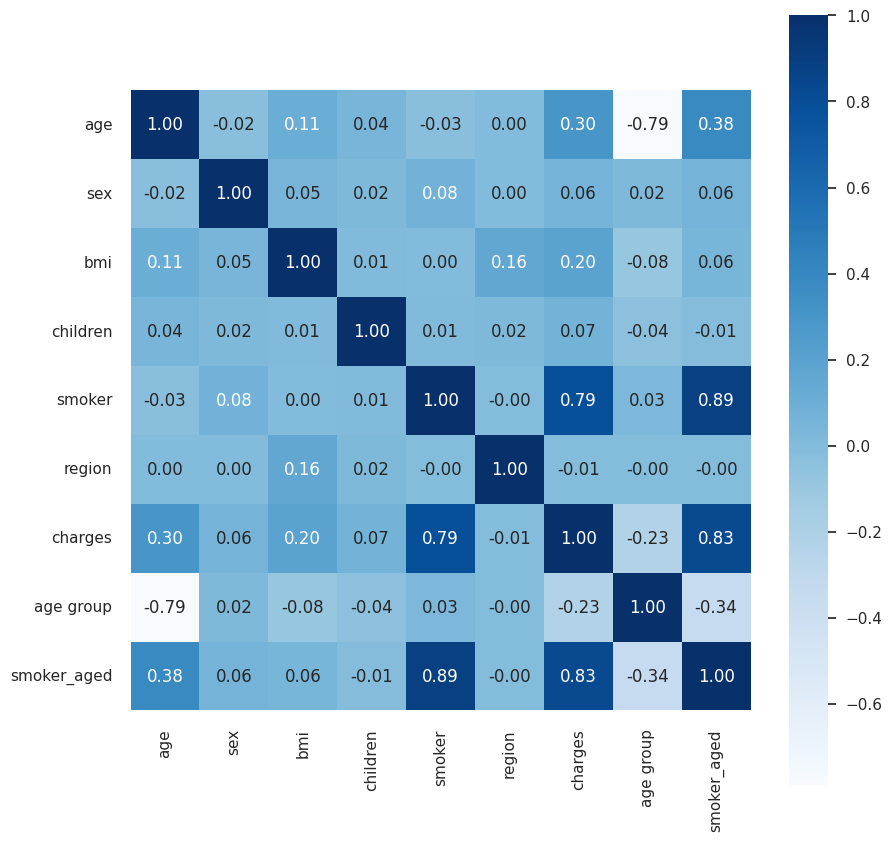

In [280]:
corr = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, cmap = 'Blues', square = True, annot = True, fmt ='.2f')
plt.show()

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

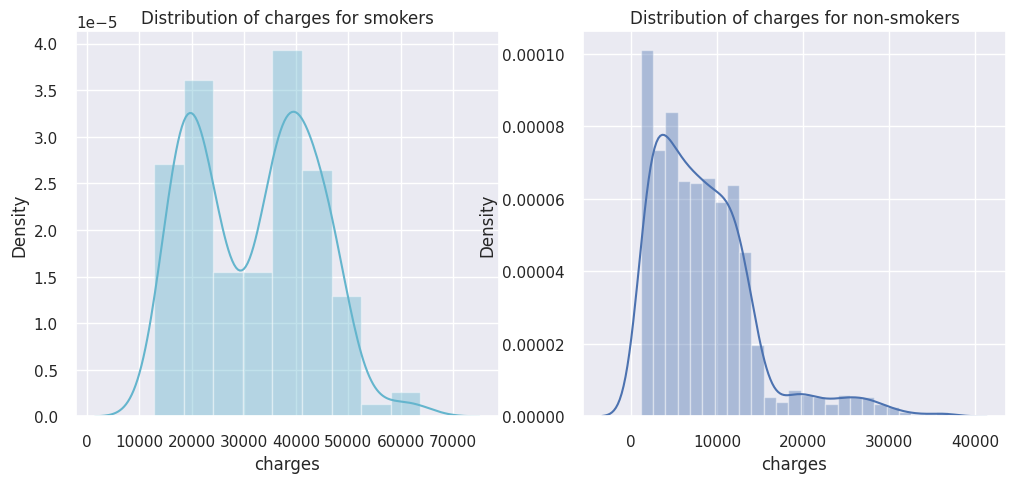

In [281]:
# Distribucion de los gastos para fumadores y no fumadores
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [282]:
# Los pacientes fumadores gastan más en tratamientos.

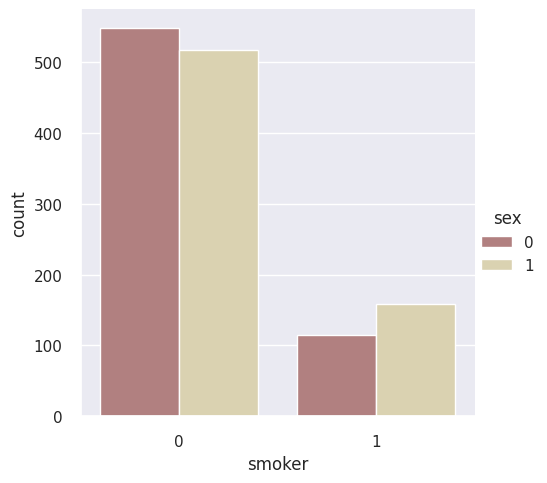

In [283]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

Considerar que las mujeres están codificadas con el símbolo "1" y los hombres con "0". Así, la cantidad de personas no fumadoras es mayor. También podemos notar que hay más hombres fumadores que mujeres fumadoras. Se puede suponer que el costo total del tratamiento en los hombres será mayor que en las mujeres, dado el impacto del tabaquismo.

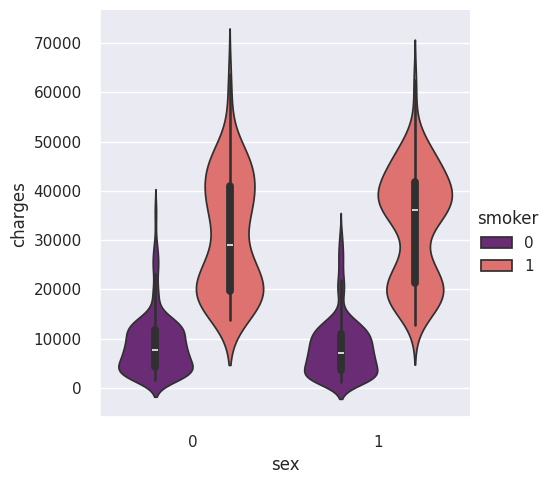

In [284]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

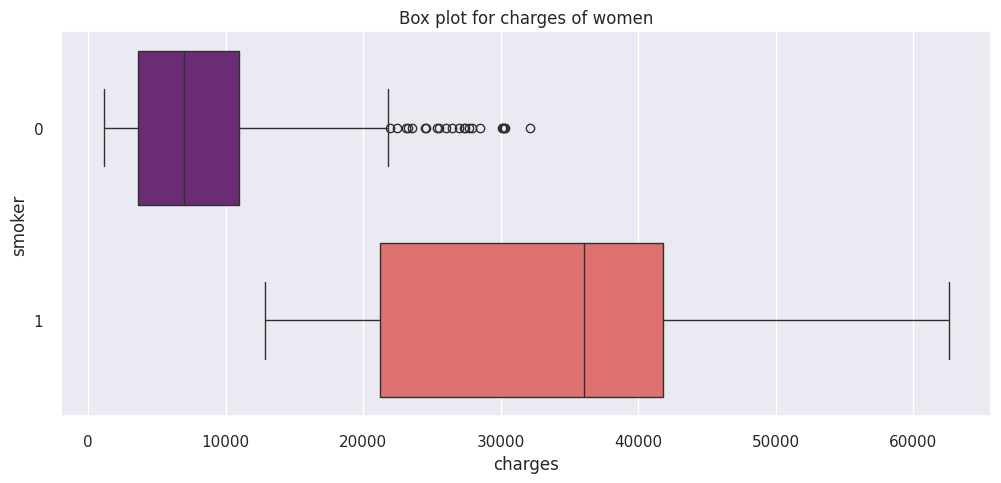

In [285]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

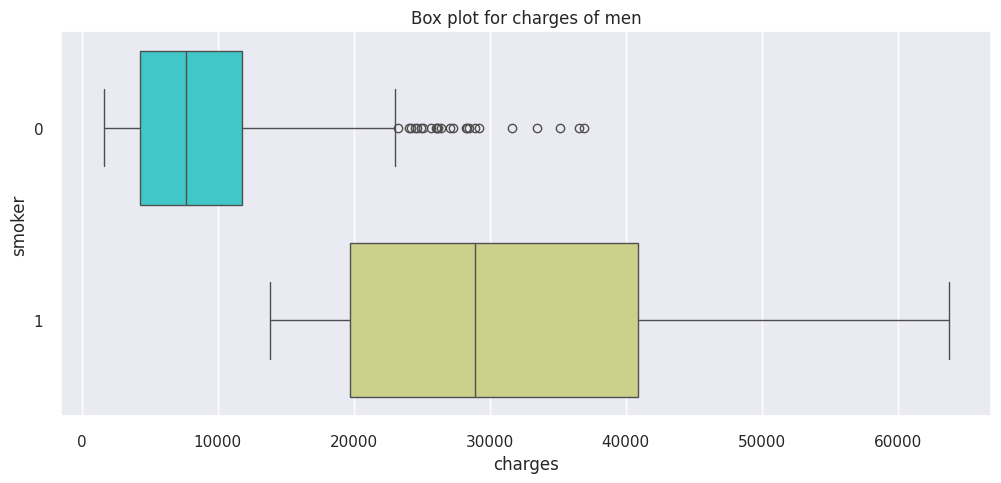

In [286]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

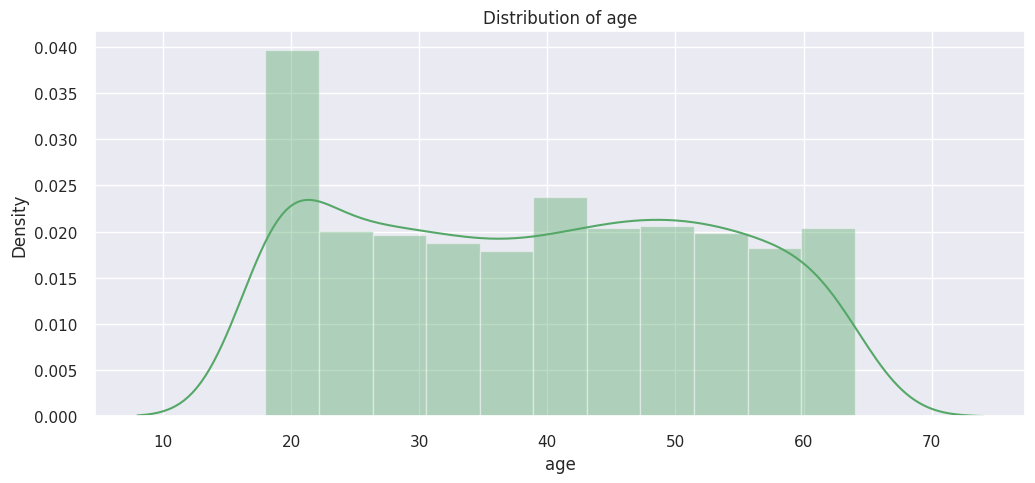

In [287]:
# Analisis de la edad de los pacientes
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

Hay pacientes menores de 20 años. La edad mínima de los pacientes es 18. La edad máxima es de 64 años. Debemos saber si hay fumadores entre los pacientes de 18 años.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

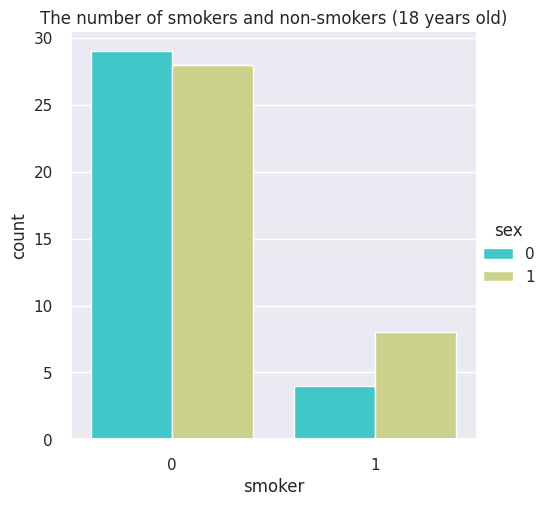

In [288]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

In [289]:
# ¿Afecta el tabaquismo el costo del tratamiento a esta edad?"

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

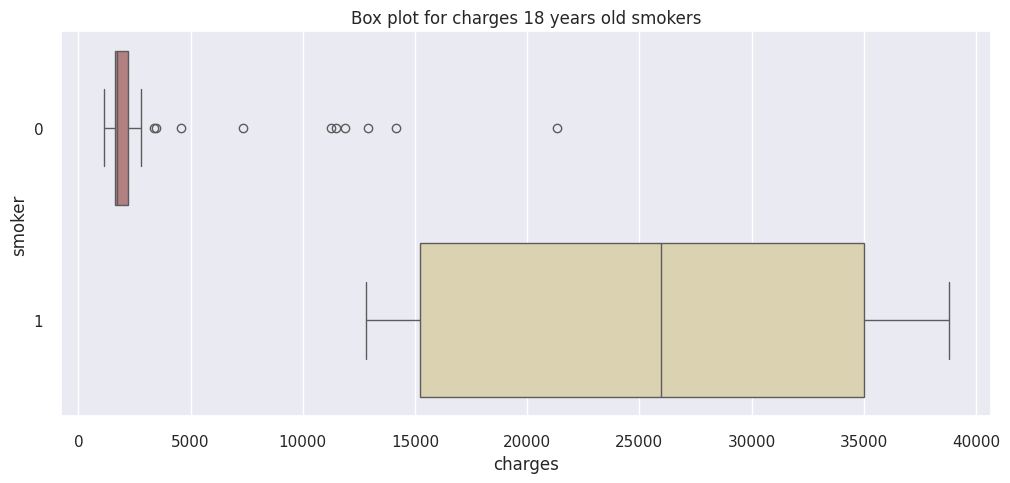

In [290]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

Incluso a la edad de 18 años los fumadores gastan mucho más en tratamiento que los no fumadores.
Entre los no fumadores estamos viendo algunas 'colas'. Puedo suponer que esto se debe a enfermedades graves o accidentes.

In [291]:
# ¿cómo depende el costo del tratamiento de la edad de los pacientes fumadores y no fumadores?

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

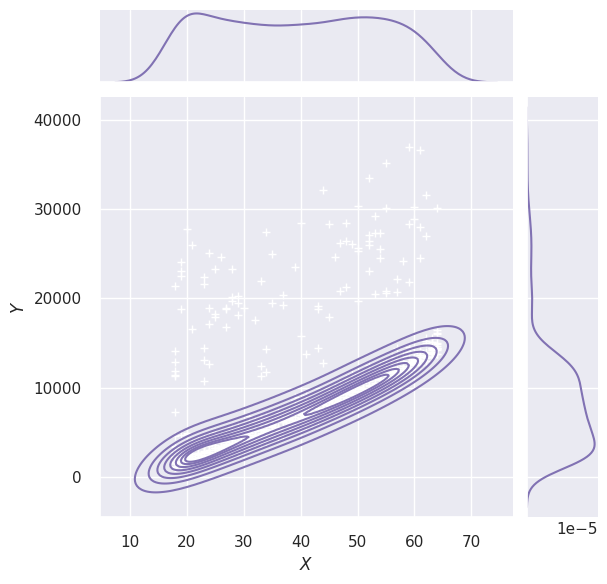

In [292]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

In [293]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

In [294]:
#non - smokers
p = figure(width=500, height=450)
p.circle(x=df[(df.smoker == 0)].age,y=df[(df.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

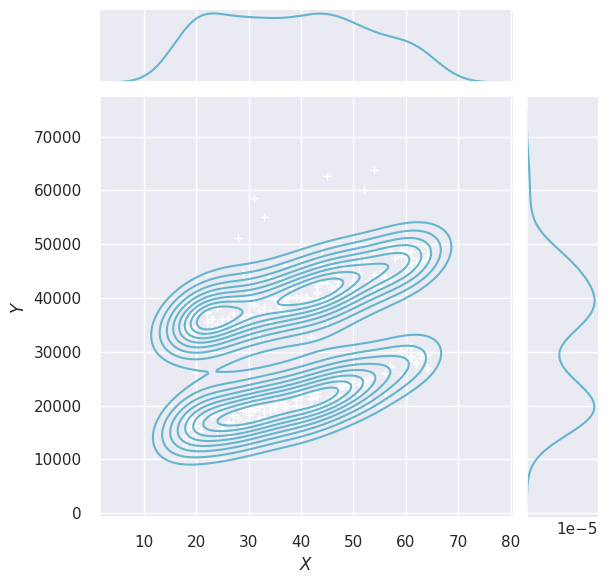

In [295]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [296]:
#smokers
p = figure(width=500, height=450)
p.circle(x=df[(df.smoker == 1)].age,y=df[(df.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

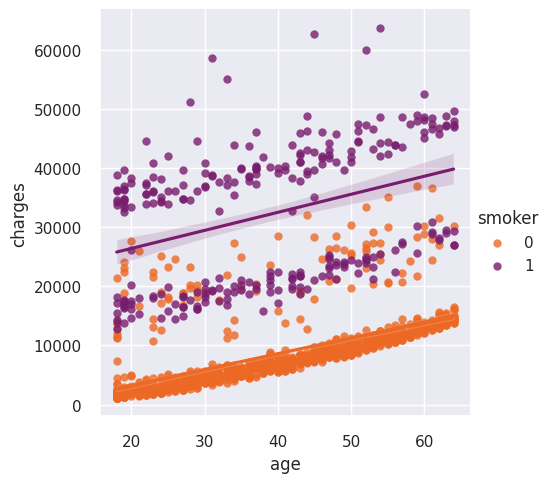

In [297]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

En los no fumadores, el costo del tratamiento aumenta con la edad. Tiene sentido.

En las personas que fuman, no vemos tal dependencia. Esto no solo se debe al tabaquismo, sino también a las particularidades del conjunto de datos. Sería más lógico juzgar el fuerte efecto del tabaquismo en el costo del tratamiento con un conjunto de datos con un mayor número de registros y características.

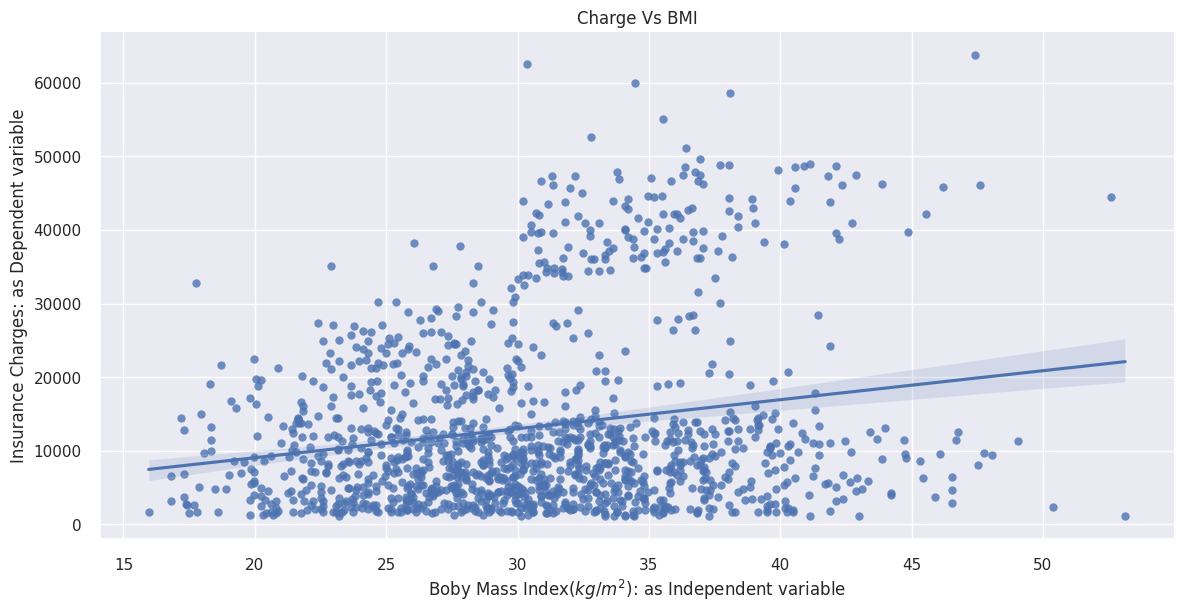

In [298]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

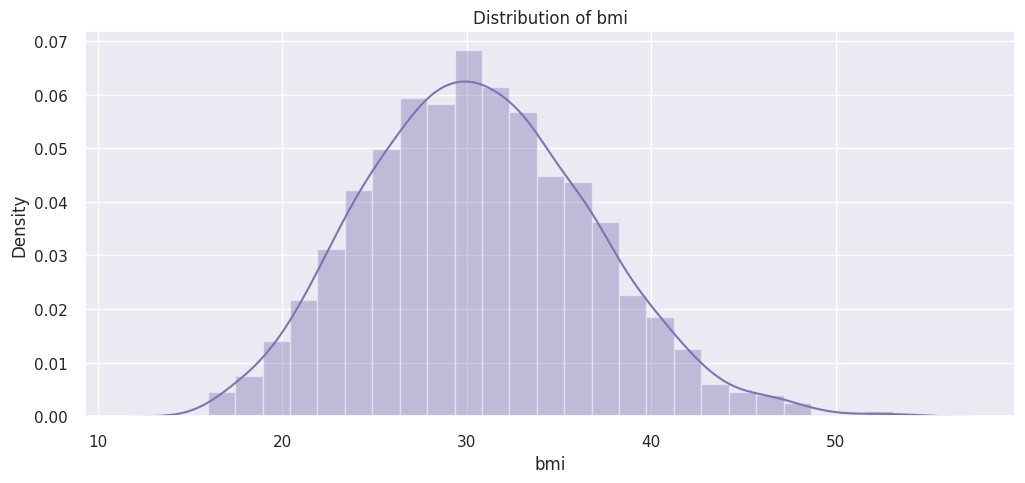

In [299]:
# Analisis del BMI
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

El IMC promedio en los pacientes es 30

Con un valor igual a 30 comienza la obesidad

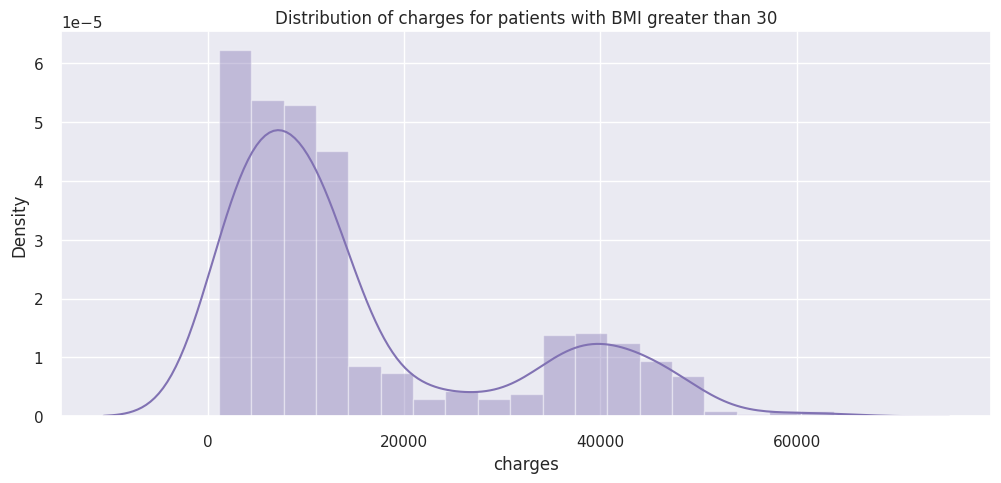

In [300]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

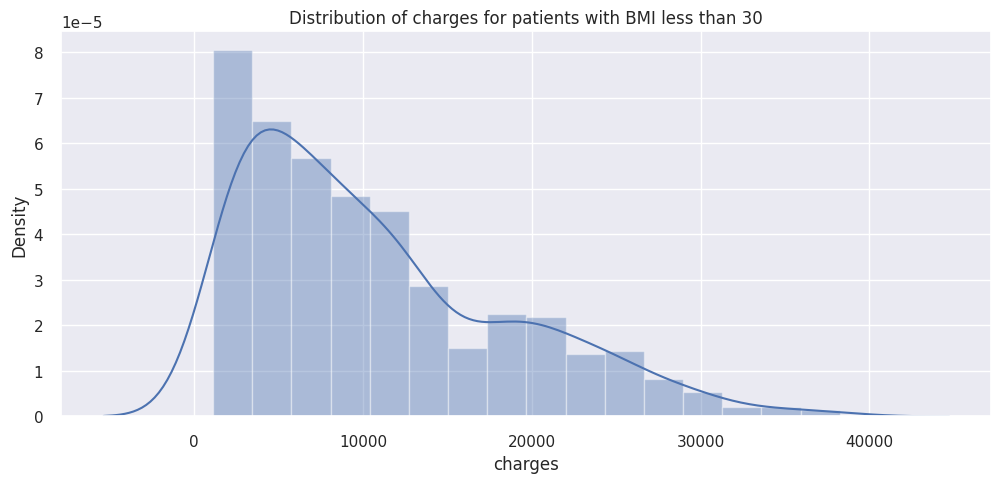

In [301]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

Los pacientes con un IMC superior a 30 gastan más en tratamientos

Text(0.5, 1.0, 'Distribution of bmi and charges')

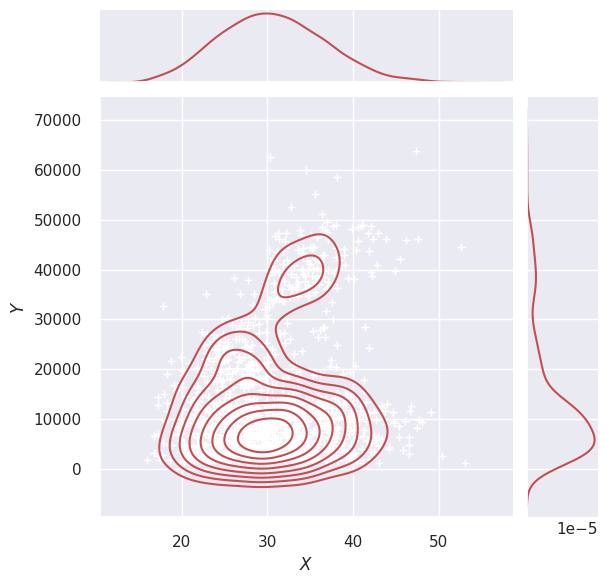

In [302]:
g = sns.jointplot(x="bmi", y="charges", data = df,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

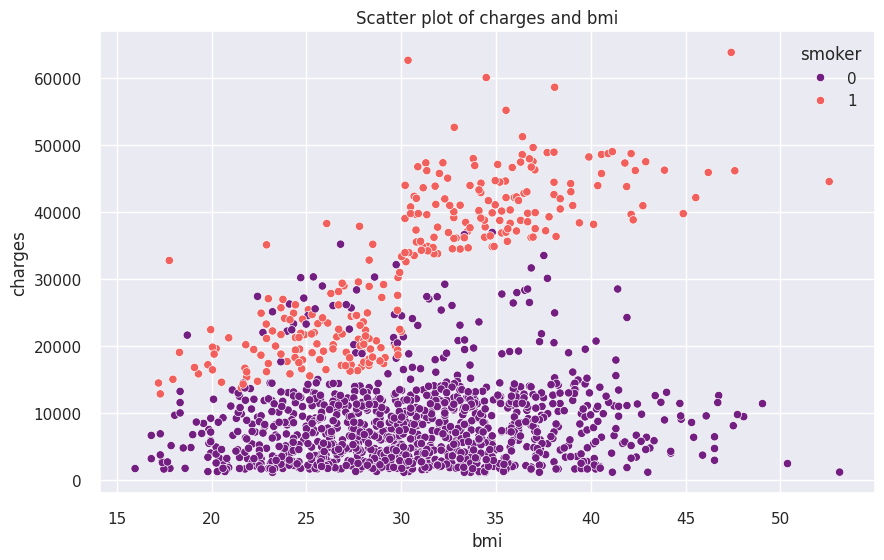

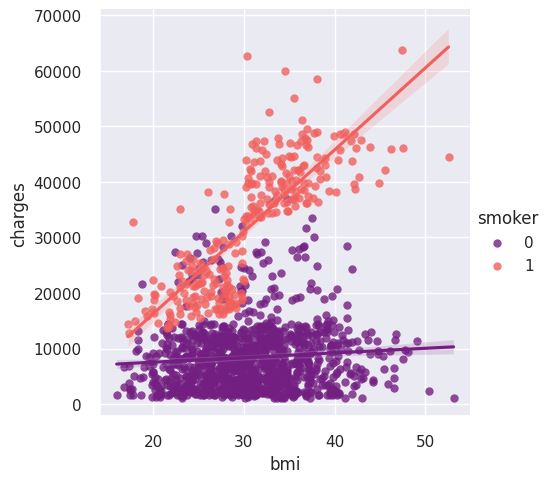

In [303]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')

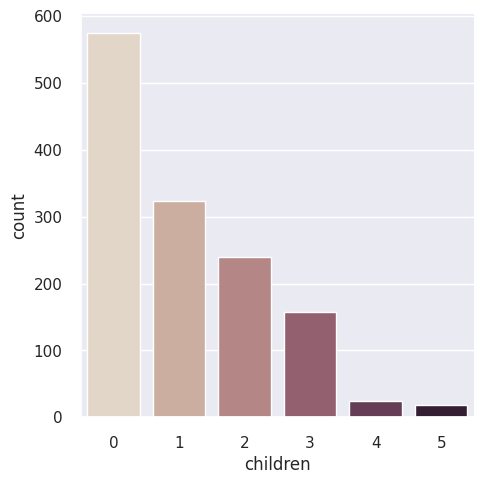

In [304]:
# Revision numero de hijos
sns.catplot(x="children", kind="count", palette="ch:.25", data=df)

La mayoría de los pacientes no tienen hijos

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

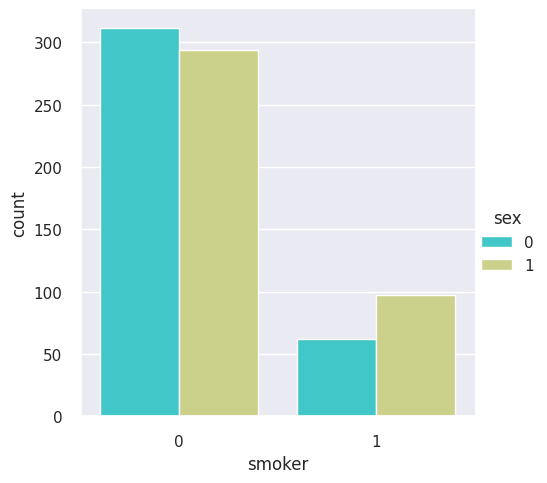

In [305]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

La mayoria de personas que tienen hijos No fuman

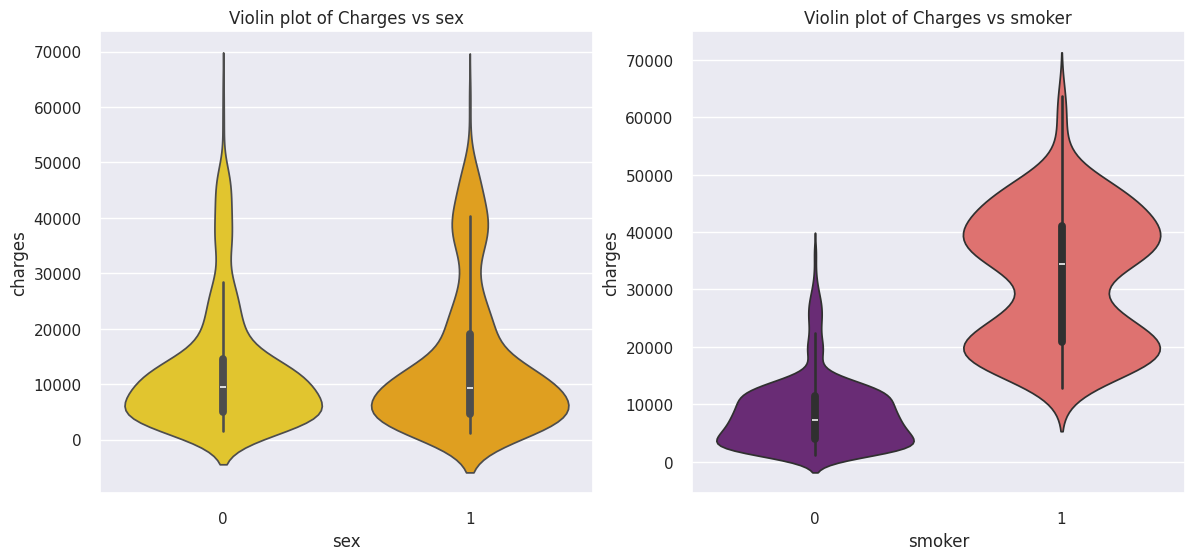

In [306]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

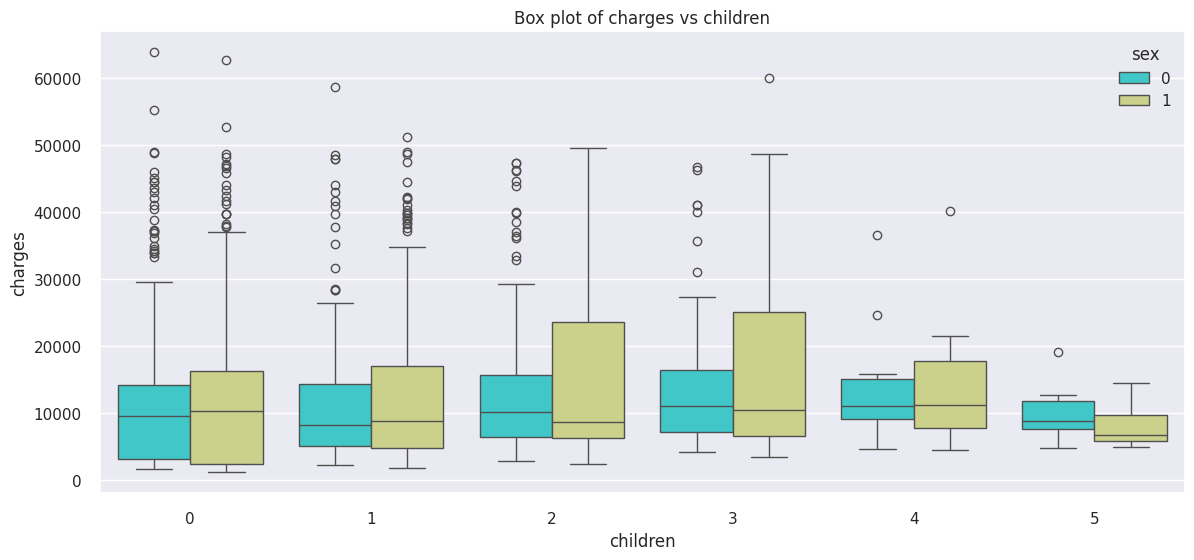

In [307]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [308]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


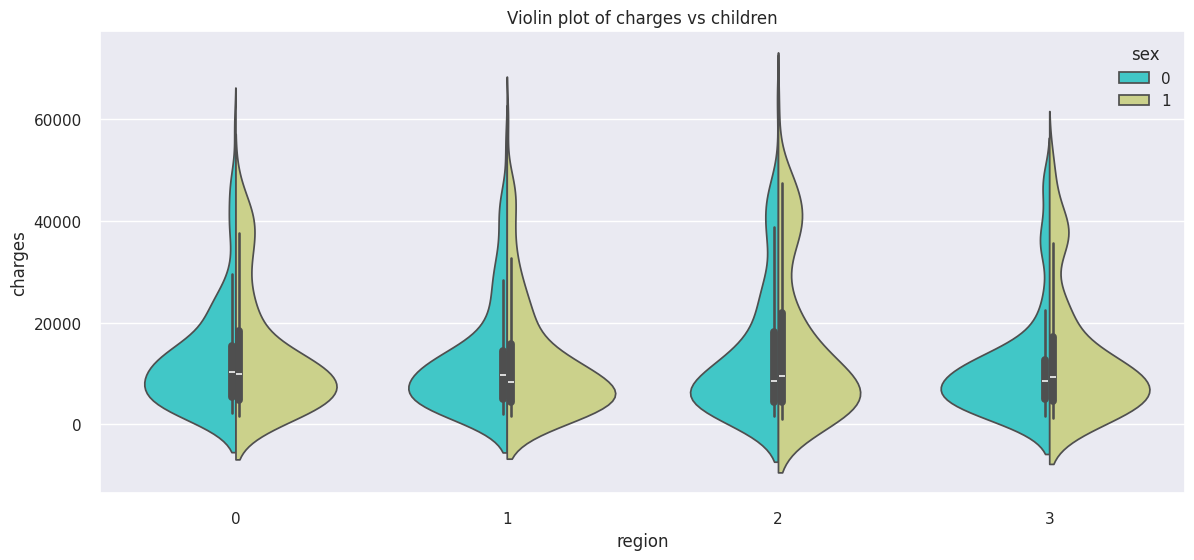

In [309]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

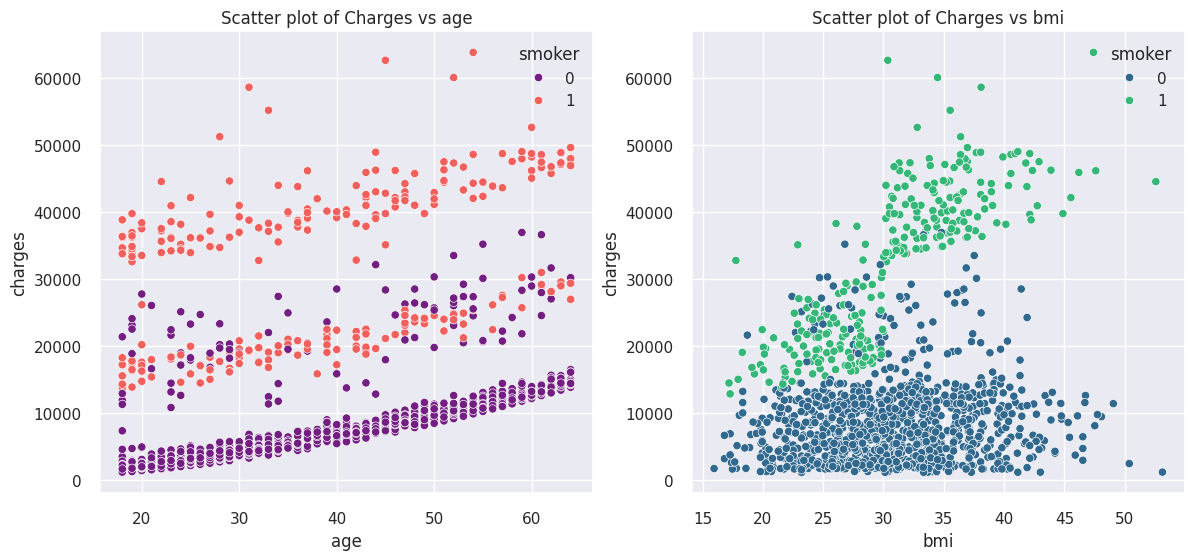

In [310]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

# **6. Modelado**

## Train-Test Split

In [311]:
X = df.drop('charges',axis=1)
Y = df['charges']

In [312]:
print(X.shape,Y.shape)

(1338, 8) (1338,)


In [313]:
from sklearn.model_selection import train_test_split

In [314]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [315]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1070, 8) (268, 8) (1070,) (268,)


## **Escalado**

In [316]:
from sklearn.preprocessing import StandardScaler

In [317]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

## **Reg Lineal**

In [318]:
from sklearn.linear_model import SGDRegressor, LinearRegression

In [319]:
lr = LinearRegression()

In [320]:
lr.fit(X_train,Y_train)

LinearRegression()

In [321]:
Y_predicted_train = lr.predict(X_train)

In [322]:
print(lr.score(X_test,Y_test))

0.7449776876299156


In [323]:
from sklearn import metrics

In [324]:
# R squeare
r2_train = metrics.r2_score(Y_train,Y_predicted_train)
r2_train

0.7520176595901201

In [325]:
Y_predicted_test = lr.predict(X_test)

In [326]:
# R squeare
r2_test = metrics.r2_score(Y_test,Y_predicted_test)
r2_test

0.7449776876299156

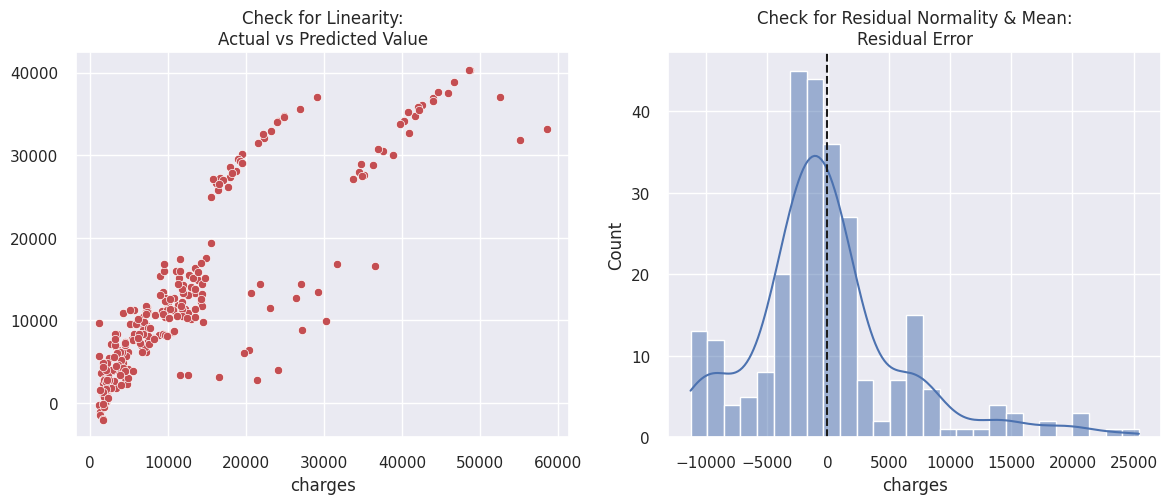

In [330]:
# Check for Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(x=Y_test, y=Y_predicted_test, ax=ax, color='r')
ax.set_title('Check for Linearity:\nActual vs Predicted Value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot(Y_test - Y_predicted_test, ax=ax, color='b', kde=True)
ax.axvline((Y_test - Y_predicted_test).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual Normality & Mean:\nResidual Error')

plt.show()

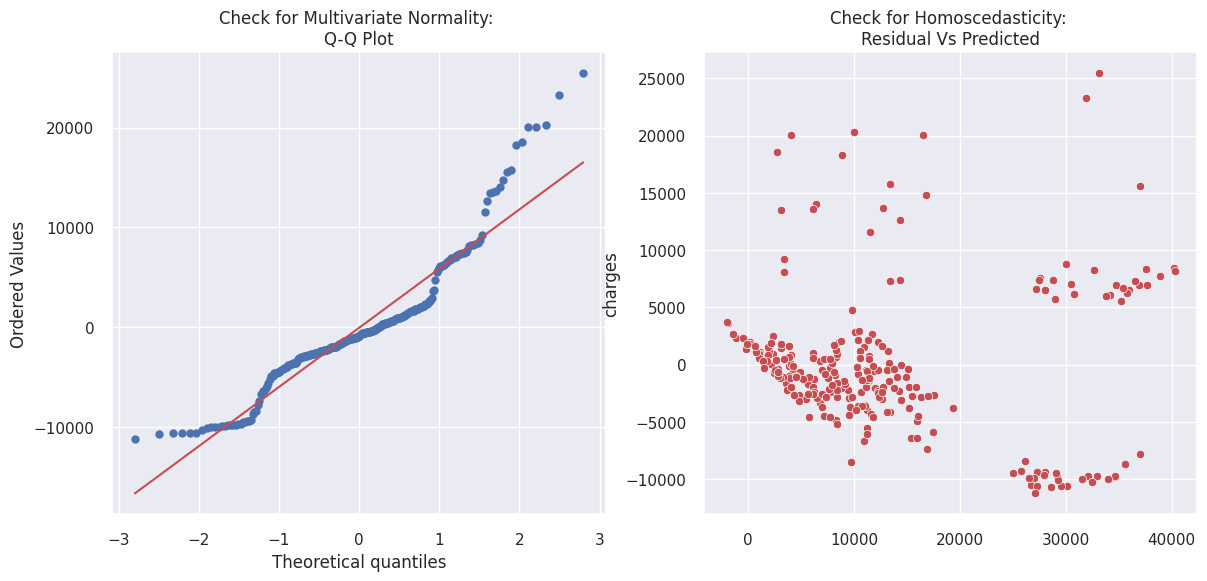

In [328]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((Y_test - Y_predicted_test),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (Y_test - Y_predicted_test), x= Y_predicted_test, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [329]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- r2_test)
VIF

3.9212255222155443

## **CV**

In [202]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,

)
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    LabelEncoder
)
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
)
from sklearn.metrics import mean_squared_error, r2_score
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')

In [203]:
def model_pipeline(model, degree=2):
    num_pipeline = Pipeline(
        steps=[
            ("poly", PolynomialFeatures(degree=degree)),
            ("scaler", StandardScaler()),
        ]
    )


    transformer = ColumnTransformer([
        ("num_transformers", num_pipeline, make_column_selector(dtype_include="number"))
        ], remainder="passthrough")

    model_pipeline = Pipeline(steps=[("transformer", transformer), ("model", model)])
    return model_pipeline

In [204]:
kf = KFold(shuffle=True, random_state=42, n_splits=3)

In [205]:
# Gride Search for Linear Regression
lr = model_pipeline(LinearRegression())
lr_grid = {"transformer__num_transformers__poly__degree": range(0, 6)}

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=lr_grid,
    cv=kf,
    scoring=("r2", "neg_mean_squared_error"),
    refit="r2",
)
grid_search.fit(X_train, Y_train)
grid_search.best_score_, grid_search.best_params_

(0.8302095568470375, {'transformer__num_transformers__poly__degree': 2})

In [206]:
best_lr = model_pipeline(
    LinearRegression(),
    degree=grid_search.best_params_["transformer__num_transformers__poly__degree"],
)

best_lr.fit(X_train, Y_train)
print("Training score", best_lr.score(X_train, Y_train))
print("Testing score", best_lr.score(X_test, Y_test))

Training score 0.845766849155795
Testing score 0.8501133850850833


##**Lasso**

In [207]:
# Lasso regression
lasso = model_pipeline(Lasso())
lasso_grid = {
    "transformer__num_transformers__poly__degree": range(1, 4),
    "model__alpha": np.geomspace(0.01, 10, 20),
}

grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_grid, cv=kf, refit="r2")
grid_search.fit(X_train, Y_train)
grid_search.best_score_, grid_search.best_params_

(0.8320300987499148,
 {'model__alpha': 10.0, 'transformer__num_transformers__poly__degree': 2})

In [208]:
best_l1 = model_pipeline(
    Lasso(alpha=grid_search.best_params_["model__alpha"]),
    degree=grid_search.best_params_["transformer__num_transformers__poly__degree"],
)

best_l1.fit(X_train, Y_train)
print("Training score", best_l1.score(X_train, Y_train))
print("Testing score", best_l1.score(X_test, Y_test))

Training score 0.8445159869107286
Testing score 0.8527184344873768


## **Ridge**

In [209]:
# Ridge Regression
ridge = model_pipeline(Ridge())
ridge_grid = {
    "transformer__num_transformers__poly__degree": range(1, 4),
    "model__alpha": np.geomspace(0.01, 10, 20),
}

grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_grid, cv=kf, refit="r2")
grid_search.fit(X_train, Y_train)
grid_search.best_score_, grid_search.best_params_

(0.8306490465108735,
 {'model__alpha': 0.08858667904100823,
  'transformer__num_transformers__poly__degree': 2})

In [210]:
best_l2 = model_pipeline(
    Ridge(alpha=grid_search.best_params_["model__alpha"]),
    degree=grid_search.best_params_["transformer__num_transformers__poly__degree"],
)

best_l2.fit(X_train, Y_train)
print("Training score", best_l2.score(X_train, Y_train))
print("Testing score", best_l2.score(X_test, Y_test))

Training score 0.8458847739570213
Testing score 0.8538718969259058


## **ElasticNet**

In [ ]:
# Elastic Net
elastic_net = model_pipeline(ElasticNet())
elastic_net_grid = {
    "transformer__num_transformers__poly__degree": range(1, 4),
    "model__alpha": np.geomspace(0.01, 10, 20),
    "model__l1_ratio": np.linspace(0.01, 1, 10),
}


grid_search = GridSearchCV(estimator= elastic_net, param_grid=elastic_net_grid, cv=kf, refit="r2")
grid_search.fit(X_train, Y_train)
grid_search.best_score_, grid_search.best_params_

In [ ]:
best_elastic_net = model_pipeline(ElasticNet(alpha=grid_search.best_params_["model__alpha"], l1_ratio=grid_search.best_params_["model__l1_ratio"]), degree=grid_search.best_params_["transformer__num_transformers__poly__degree"])
best_elastic_net.fit(X_train, Y_train)
print("Training score", best_elastic_net.score(X_train, Y_train))
print("Testing score", best_elastic_net.score(X_test, Y_test))

# **Evaluacion**

In [ ]:
def rmse(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

In [ ]:
def compare_models(models, X, y):
    evaluate = dict()

    for label, model in models.items():
        ypred = model.predict(X)
        score = (r2_score(y, ypred) * 100).round(2)
        loss = (rmse(y, ypred)).round(2)
        evaluate[label] = [loss, score]
    return evaluate

In [ ]:
models = dict(lr = best_lr, lasso=best_l1, ridge=best_l2, elastic_net = best_elastic_net)

train_score_df = pd.DataFrame(compare_models(models, X_train, Y_train), index=["rmse", "r2_score"]).T
test_score_df = pd.DataFrame(compare_models(models, X_test, Y_test), index=["rmse", "r2_score"]).T

In [ ]:
def plot_actual_vs_pred(model, X, y, ax):
    ypred = model[-1].predict(X)
    sns.scatterplot(x=ypred, y=y, legend=False, ax=ax, size=3.5)
    ax.set_title(f"{model[0]}", size=10)


fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 4), gridspec_kw={"wspace": 0.1}, frameon=True)
plot_actual_vs_pred(("Linear regression", best_lr), X_train, Y_train, ax=axes[0])
plot_actual_vs_pred(("Lasso regression", best_l1), X_train, Y_train, ax=axes[1])
plot_actual_vs_pred(("Ridge regression", best_l2), X_train, Y_train, ax=axes[2])
plot_actual_vs_pred(("Elasticnet regression", best_elastic_net), X_train, Y_train, ax=axes[3])
fig.suptitle("Actual charges vs Predict charges")
plt.show()

In [ ]:
from scipy.stats import probplot

def quantile_plot(model, X, y, ax):
    ypred = model[-1].predict(X)
    loss = y - ypred
    probplot(loss, dist="norm", plot=ax)
    ax.set_title(f"{model[0]}", size=10)
    ax.set_ylabel(ax.get_ylabel(), visible=False)


fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 4), gridspec_kw={"wspace": 0.1}, frameon=True)
quantile_plot(("Linear regression", best_lr), X_train, Y_train, ax=axes[0])
quantile_plot(("Lasso regression", best_l1), X_train, Y_train, ax=axes[1])
quantile_plot(("Ridge regression", best_l2), X_train, Y_train, ax=axes[2])
quantile_plot(("Elasticnet regression", best_elastic_net), X_train, Y_train, ax=axes[3])
fig.suptitle("Normal Q-Q plot")
plt.show()

## **Reg Polinomica**

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8790440786692397


In [227]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train,forest_train_pred),
mean_squared_error(Y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train,forest_train_pred),
r2_score(Y_test,forest_test_pred)))

MSE train data: 3672781.206, MSE test data: 20702780.665
R2 train data: 0.974, R2 test data: 0.868


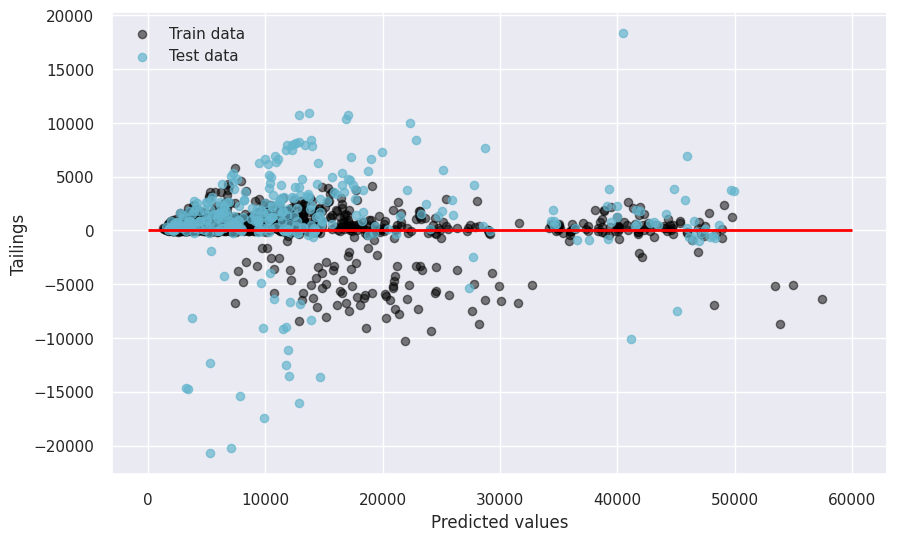

In [229]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - Y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - Y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# **7. Predictive System**

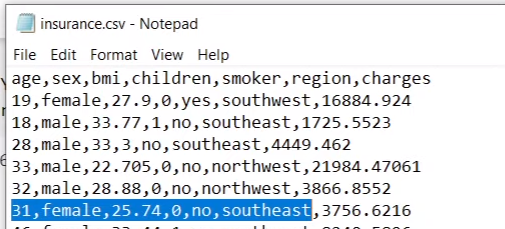

In [66]:
input_data = (31,1,25.74,0,1,0)

## Convert to numpy array
input_data_np = np.asarray(input_data)

## Reshape the array
input_data_np_rh = input_data_np.reshape(1,-1)

In [67]:
input_data_np_rh

array([[31.  ,  1.  , 25.74,  0.  ,  1.  ,  0.  ]])

In [68]:
prediction = lr.predict(input_data_np_rh)
prediction

array([28429.2347188])